# 데이콘 Basic Summer
## 서울 랜드마크 이미지 분류 경진대회

## 첫번째 Baseline

안녕하세요 데이커 여러분!  
데이콘 Basic Summer에 오신 것을 환영합니다.

올해도 무더운 여름이 찾아왔습니다. 
여름 방학이라고 하면 Shopping에 이어, Vacation🧳을 빼놓을 순 없겠죠!

<img src='https://user-images.githubusercontent.com/101694546/182985550-3b3b8f81-c01c-4ce1-bddb-d2b62e4105b3.png' align=center>

각종 SNS에 쏟아지는 여름철 휴가 여행 사진들을 보면    
여행 욕구가 마구마구 샘솟는데요!   
우리는 다양한 휴가지들 속에서 최고의 여름날의 추억🌅을 쌓기 위해   
휴가지의 사진들을 참고하여 여행 장소를 고르곤 합니다.🌉   

그렇다면 휴가지 랜드마크의 이미지와 이름 사이에는 어떤 관계가 있을까요?    
랜드마크의 이미지만으로 랜드마크의 이름을 구별할 수 있을까요?

------

데이콘과 함께, 초보부터 고수까지 모두가 참여하는 데이콘 Basic Summer   
**랜드마크 이미지 분류 대회**를 소개합니다.

이번 대회는 랜드마크의 이미지 데이터를 통해 라벨을 분류하는 대회입니다.

이미지를 이용하여 랜드마크의 라벨을 분류하는 간단한 대회 처럼 보이지만,   
컴퓨터 비전을 처음 접하는 분들에게는 어디부터 시작해야 하는지 막막하실 겁니다.

간단한 대회 처럼 보이지만, 데이터 분석을 처음 접하는 분들에게는 어디부터 시작해야 하는지 막막하실 겁니다.

데이콘이 준비한 컴퓨터 비전 베이스라인을 통해 데이터 분석에 입문해보세요!🥇

<p style='text-align: right;'> August, 2022 | All rights reserved by Dacon</p>

# I. 데이터 살펴보기

데이터 분석을 하기 위해 가장 먼저 해야할 일이 무엇일까요?

바로 데이터를 살펴보는 일입니다.  
주어진 데이터를 살펴보며 데이터의 모양과 대략적인 내용을 파악하고, 무슨 분석이 가능한지 확인하여 분석의 방향을 잡는 과정이 필요합니다.

대회 페이지의 [데이터] 탭에서 압축 파일을 다운받아 압축을 풀어주었다면 현재 폴더 구조는 아래와 같을 것입니다.

(현재 위치)  
- baseline.ipynb
- dataset (폴더)
  - train.csv
  - test.csv
  - sample_submission.csv
  - train (폴더)
    - 001.PNG
    - 002.PNG
    - ...
  - test (폴더)
    - 001.PNG
    - 002.PNG
    - ...
    
이번 대회의 데이터의 종류는 총 5가지이며 train, test 이미지 파일과 3개의 csv 파일 입니다.

1. train 이미지 (001.PNG ~ 723.PNG) : 데이터 분석 모델을 학습(train)하기 위해 사용하는 이미지 데이터
2. test 이미지 (001.PNG ~ 199.PNG) : 데이터 분석 모델을 통해 정답을 예측하기 위해 사용하는 이미지 데이터
3. train.csv : 이미지의 파임이름별로 정답라벨이 들어있는 데이터
4. test.csv : 이미지의 파일이름만 들어있는 데이터
5. sample_submission.csv : 예측한 정답 값을 기록하여 제출하기 위한 샘플 정답 파일

## 1. 데이터 준비

### 1.1. csv 데이터
먼저 분석하려는 데이터를 작업장으로 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를 편하게 다루도록 해주는 라이브러리입니다.

In [1]:
import pandas as pd
label_df = pd.read_csv('data/save_data/train.csv')
label_df.head()

,file_name,label
0,001.PNG,9
1,002.PNG,4
2,003.PNG,1
3,004.PNG,1
4,005.PNG,6


### 1.2. 이미지 데이터

또한 데이터 이미지의 local adress와 label 값을 list에 저장해주도록 하겠습니다.

In [5]:
import os
from glob import glob

def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.PNG')))
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
        
    # get label
    label_list.extend(label_df['label'])
                
    return img_path_list, label_list

def get_test_data(data_dir):
    img_path_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.PNG')))
    img_path_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))
    #print(img_path_list)
    
    return img_path_list

## 2. 데이터 확인

### 2.1. csv 데이터

이제 데이터가 어떻게 생겼는지 살펴봅시다.

데이터를 살펴 볼 때에는 pandas의 **info()** 메소드를 활용하여 데이터를 살펴보는 경우가 많습니다.

이는 데이터의 특성을 알아보기 위함입니다.

In [2]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  723 non-null    object
 1   label      723 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


총 723의 행과 2개의 열을 가지고 있습니다.

file_name은 object 타입으로,

label이 int 타입으로 되어있는 것을 확인할 수 있습니다.

### 2.2. 이미지 데이터

In [6]:
all_img_path, all_label = get_train_data('data/save_data/train')
test_img_path = get_test_data('data/save_data/test')

label값 상위 5개를 확인해봅시다.

In [11]:
all_label[:5]

[9, 4, 1, 1, 6]

이미지의 경로도 한번 확인해보겠습니다.

In [12]:
all_img_path[:5]

['data/save_data/train/001.PNG',
 'data/save_data/train/002.PNG',
 'data/save_data/train/003.PNG',
 'data/save_data/train/004.PNG',
 'data/save_data/train/005.PNG']

In [13]:
test_img_path[:5]

['data/save_data/test/001.PNG',
 'data/save_data/test/002.PNG',
 'data/save_data/test/003.PNG',
 'data/save_data/test/004.PNG',
 'data/save_data/test/005.PNG']

## 3. 환경설정

데이터를 전처리 하기위한 GPU 딥러닝 환경설정을 해보도록 하겠습니다

In [7]:
import torch
import torch.nn as nn

os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "2"  # Set the GPU 2 to use, 멀티 gpu

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [8]:
#GPU 체크 및 할당
if torch.cuda.is_available():    
    #device = torch.device("cuda:0")
    print('Device:', device)
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

Device: cuda
There are 1 GPU(s) available.
We will use the GPU: Tesla V100-PCIE-32GB


하이퍼 파라미터 값을 미리 지정하겠습니다.

In [9]:
#하이퍼 파라미터 튜닝

CFG = {
    'IMG_SIZE':128, #이미지 사이즈
    'EPOCHS':50, #에포크
    'LEARNING_RATE':2e-2, #학습률
    'BATCH_SIZE':12, #배치사이즈
    'SEED':41, #시드
}

모델의 재현성을 위하여 random seed를 고정하겠습니다.

In [10]:
# Seed 고정
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED'])

# II. 데이터 전처리

## 2. CustomDataset

CustomDataset을 만들어 전체 dataset을 구성해보도록 하겠습니다.  

In [14]:
import torchvision.datasets as datasets # 이미지 데이터셋 집합체
import torchvision.transforms as transforms # 이미지 변환 툴

from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴
from torch.utils.data import DataLoader, Dataset

import cv2

class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True, transforms=None): #필요한 변수들을 선언
        self.transforms = transforms
        self.train_mode = train_mode
        self.img_path_list = img_path_list
        self.label_list = label_list

    def __getitem__(self, index): #index번째 data를 return
        img_path = self.img_path_list[index]
        # Get image data
        #print(img_path)
        image = cv2.imread(img_path)
        if self.transforms is not None:
            image = self.transforms(image)

        if self.train_mode:
            label = self.label_list[index]
            return image, label
        else:
            return image
    
    def __len__(self): #길이 return
        return len(self.img_path_list)

데이터 셋에서 정상적으로 데이터 셋이 만들어 졌는지 임시로 이미지를 하나 추출해보도록 하겠습니다.

In [16]:
tempdataset = CustomDataset(all_img_path, all_label, train_mode=False)

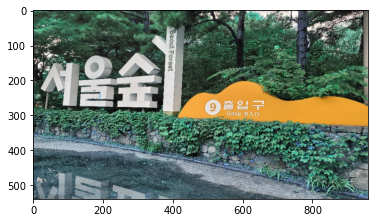

In [17]:
import matplotlib.pyplot as plt

plt.imshow(tempdataset.__getitem__(0))

임시 데이터 셋의 첫번째 이미지 데이터는 서울숲 이군요!

## 3. Train / Validation Split

그럼 학습시킬 데이터 셋과 검증할 데이터 셋을 분리해주도록 하겠습니다.

In [18]:
# Train : Validation = 0.75 : 0.25 Split
train_len = int(len(all_img_path)*0.75)
Vali_len = int(len(all_img_path)*0.25)

train_img_path = all_img_path[:train_len]
train_label = all_label[:train_len]

vali_img_path = all_img_path[train_len:]
vali_label = all_label[train_len:]

In [19]:
print('train set 길이 : ', train_len)
print('vaildation set 길이 : ', Vali_len)

train set 길이 :  542
vaildation set 길이 :  180


train set은 542개, vaildation set은 180개로 나뉘어진 것을 확인할 수 있습니다.  

## 4. transform

그럼 나뉜 데이터 셋에서 이미지를 분석 하기 위해 이미지 변형(transform)을 적용해보도록 하겠습니다.

In [20]:
train_transform = transforms.Compose([
                    transforms.ToPILImage(), #Numpy배열에서 PIL이미지로
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]), #이미지 사이즈 변형
                    transforms.ToTensor(), #이미지 데이터를 tensor
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)) #이미지 정규화
                    
                    ])

test_transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                    ])

## 5. Dataloader
Dataloader class는 batch기반의 딥러닝모델 학습을 위해서 mini batch를 만들어주는 역할을 합니다. 

dataloader를 통해 dataset의 전체 데이터가 batch size로 나뉘게 됩니다. 

만들었던 dataset을 input으로 넣어주면 여러 옵션(데이터 묶기, 섞기, 알아서 병렬처리)을 통해 batch를 만들어 내는 것입니다.

In [21]:
# Get Dataloader

#CustomDataset class를 통하여 train dataset생성
train_dataset = CustomDataset(train_img_path, train_label, train_mode=True, transforms=train_transform) 
#만든 train dataset를 DataLoader에 넣어 batch 만들기
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=0)

#vaildation 에서도 적용
vali_dataset = CustomDataset(vali_img_path, vali_label, train_mode=True, transforms=test_transform)
vali_loader = DataLoader(vali_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

In [22]:
train_batches = len(train_loader)
vali_batches = len(vali_loader)

print('total train imgs :',train_len,'/ total train batches :', train_batches)
print('total valid imgs :',Vali_len, '/ total valid batches :', vali_batches)

total train imgs : 542 / total train batches : 46
total valid imgs : 180 / total valid batches : 16


배치 사이즈가 12이므로    
train은 46 묶음 vaildation은 16 묶음으로 묶인 것을 볼 수 있습니다.

# III. 모델링

## 1. 모델 구조 정의

이제 CNN(Convolutional Neural Network) 모델을 학습시키기 위한 데이터가 준비되었다면          
모델 구조를 설정하는 단계로 넘어가겠습니다.

실습에 앞서, 코드로 들어가기 전 먼저 간단하게 CNN 모델을 이해하기 위한 기본 개념들을 둘러보겠습니다.

### - Neural Network (신경망)
신경망은 다른 말로 인공 신경망(Artificial Neural Network)이라고도 불립니다.

신경망이란 뇌 속 뉴런의 망형 구조를 닮은 다층형 구조의 컴퓨팅 모델입니다.   
여기에는 서로 연결된 처리 소자, 일명 '뉴런'이라는 것이 있으며 생물학적 뉴런을 수학적으로 모델링한 것인데,   
이들이 서로 협력하여 출력 함수를 도출합니다.   

신경망은 입력 및 출력 계층/차원으로 구성되며 대부분은 숨겨진 계층도 있습니다.   
숨겨진 계층은 입력을 출력 계층에서 사용할 수 있는 무언가로 변환해주는 단위로 구성됩니다.  
따라서 인공신경망 뉴런은 여러 입력값을 받아 일정 수준을 넘어서게 되면 활성화되고 출력값을 내보냅니다.

### 1) Activation Function (활성화 함수)

딥러닝 네트워크에서 노드에 입력된 값들을 비선형 함수에 통과시킨 후 다음 레이어로 전달하는데,    
이 때 사용하는 함수를 활성화 함수(Activation Function)라고 합니다.

선형 함수가 아니라 비선형 함수를 사용하는 이유는 딥러닝 모델의 레이어 층을 깊게 가져갈 수 있기 때문입니다.

그럼 대표적인 활성화 함수 몇가지만 보겠습니다.

#### 1.1) Sigmoid
Sigmoid 함수는 Logistic 함수라고 불리기도 하며, x의 값에 따라 0~1의 값을 출력하는 S자형 함수입니다.  
sigmoid 함수는 활성화 함수(Activation function)로 많이 사용되며 보통 0.5 미만은 0, 이상은 1을 출력하게 됩니다.

sigmoid(x) = 1 / 1 + exp(-x)   
그래프는 다음과 같습니다.

그러나 이런 sigmoid 함수에는 단점이 있습니다.

그래프를 보시면 양 극단 값의 기울기(미분값)이 0에 가까워져 학습이 되지 않는 문제가 발생합니다.     
이를 Gradient Vanishing 문제라고 하는데 이러한 문제를 해결하기 위해 다양한 활성화 함수들이 고안되었습니다.   

### 2) Perceptron (퍼셉트론)
퍼셉트론이란 신경망의 기원이 되는 개념으로, Frank Rosenblatt이 1957년 고안한 알고리즘입니다.

이는 여러 신호를 입력받아 0(흐르지 않는다) 또는 1(흐른다)이라는 출력값을 앞으로 전달합니다.

각 입력 신호 X는 각 가중치 w와 곱해집니다. 가중치가 클수록 그 신호가 중요하다는 뜻입니다.

그러나 퍼셉트론은 단순한 선형 분류기로, AND나 OR과 같은 분류는 가능하나 XOR 분류는 불가능합니다.

### 3) MLP(Multi-Layer Perceptron 다층 퍼셉트론)

직선형 영역만 표시할 수 있는 단층 퍼셉트론의 한계를 극복하기 위해 고안된 것이 다층 퍼셉트론입니다.

XOR 문제의 경우 각 영역을 직선으로 분리가 불가능한데, 비선형 영역까지 표현 가능한 다층 퍼셉트론으로 XOR 게이트까지 구현할 수 있습니다.


In [24]:
from tqdm.auto import tqdm
import torch.nn as nn # 신경망들이 포함됨
#import torch.nn.init as init # 텐서에 초기값을 줌

class CNNclassification(torch.nn.Module):
    def __init__(self):
        super(CNNclassification, self).__init__()
        self.layer1 = torch.nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.layer3 = torch.nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.layer4 = torch.nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=1), #cnn layer
            nn.ReLU(), #activation function
            nn.MaxPool2d(kernel_size=2, stride=2)) #pooling layer
        
        self.fc_layer = nn.Sequential( 
            nn.Linear(3136, 10) #fully connected layer(ouput layer)
        )    
        
    def forward(self, x):
        
        x = self.layer1(x) #1층
        
        x = self.layer2(x) #2층
         
        x = self.layer3(x) #3층
        
        x = self.layer4(x) #4층
        
        x = torch.flatten(x, start_dim=1) # N차원 배열 -> 1차원 배열
        
        out = self.fc_layer(x)
        return out

### Convoultion Layer

Convolution Layer에서는 이미지의 특징(feature map)을 추출해내는 역할을 합니다.   

입력 데이터가 주어지면 필터를 이용해 특징을 추출한 다음 아웃풋을 내보냅니다.   

이 필터는 커널(Kernel) 혹은 가중치의 배열이라고도 부르며 이 값을 조정하는 것이 곧 학습을 의미합니다.   

첫번째 Convolution Layer에서는 3x3 크기의 커널을 사용했습니다. 이는 곧 학습해야 할 가중치가 9개라는 뜻입니다.   
  
### Stride   
커널을 이동시키는 거리입니다. 특별한 언급이 없다면 1로 가정합니다.   

Convolution을 하게되면 입력 데이터의 크기가 자연스럽게 줄어들게 되는데, 

주변에 값이 0인 셀들을 추가(Padding)해서 입력 데이터의 크기를 유지시키기도 합니다.

### Padding
zero padding은 이미지 주위에 0을 둘러서 이미지 데이터의 축소를 방지해주는 역할을 합니다.

필터로 인해 특징이 추출되면 자연스럽게 크기가 작아지는데, 

이미지 벡터들 가장자리에 0을 채워 Convolution Layer를 통과할 때 크기를 동일하게 유지시켜줄 수 있습니다.

### ReLU
앞서 도입부에서 말씀 드린 것 처럼, ReLU는 활성화 함수 중 하나입니다.

Gradient Vanishing 문제를 해결 가능하고 계산이 빠르고 양 극단값이 포화되지 않는다는 장점이 있습니다.

### Pooling Layer - Max Pooling

Pooling Layer는 데이터의 공간적 크기를 축소하는데 사용합니다.

보통 이 레이어에서 이미지의 크기를 조절하며, CNN에서는 주로 Max-Pooling 방식을 사용합니다.

Conv layer 는 이미지의 특정 영역의 특징을 잡아내는 역할이라면, 

Pooling 은 이미지의 크기를 줄이는 동시에 이미지의 전체의 특징 또한 보존합니다.

따라서 Pooling 은 모델로 하여금 이미지 전체를 볼 수 있게 도와줍니다.

Max Pooling에서는 선택된 영역에서 가장 큰 값을 뽑아 대표값으로 설정하는 방식입니다.

이를 통해 학습 시간을 단축하고 오버피팅 문제를 완화할 수 있습니다.

### Fully Connected (output) Layer

이전 레이어의 출력을 평탄화하여 다음 스테이지의 입력이 될 수 있는 단일 벡터로 변환합니다.

마지막으로 각 라벨에 대한 최종 확률을 제공합니다.

## 2. 모델 학습

이제 모델 학습을 하기 위해 매개변수를 정의해보도록 하겠습니다.

In [25]:
import torch.optim as optim # 최적화 알고리즘들이 포함힘

model = CNNclassification().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = CFG["LEARNING_RATE"])
scheduler = None

이번 베이스라인에서는 모델은 기본 CNN classification 모델을 사용했습니다.

### Loss Function

손실함수로는 classification 문제이기 때문에 'CrossEntropyLoss'를 사용했습니다.

손실함수는 실제 값과 모델이 예측한 값의 거리를 출력하는 함수 입니다.

쉽게 말해 손실함수는 모델의 예측이 얼마나 틀렸는지를 알려주는 함수 입니다.

이 때 "모델의 예측이 얼마나 틀렸는지" 를 어떻게 정의하느냐에 따라 어떤 Loss Function 을 사용할 지가 정해지는 것 입니다.

### Optimizer 

최적화 함수로는 확률적 경사 하강법인 'SGD(Stochastic Gradient Descent)'를 사용했습니다. 

Optimizer는 학습 데이터(Train data)셋을 이용하여 모델을 학습 할 때 데이터의 실제 결과와 모델이 예측한 결과를 기반으로 잘 줄일 수 있게 만들어주는 역할을 합니다.

여기서 learning rate, 학습률은 얼마나 빠른속도로 이동할것이냐 입니다.

learning rate를 엄청 크게 설정한다면 원하는 값까지 빠르게 도달할 수 있지만 자칫하면 오히려 최소값을 계산하도록 수렴하지 못합니다.

반면 너무 작은 경우는 시간이 매우 오래걸립니다.

따라서 적절한 learning rate설정이 중요합니다.

이제 train 메소드를 통하여 train을 학습 시켜 vaildation으로 평가하는 메소드를 작성해보겠습니다.

In [26]:
from tqdm import tqdm

def train(model, optimizer, train_loader, scheduler, device): 
    model.to(device)
    n = len(train_loader)
    best_acc = 0
    
    for epoch in range(1,CFG["EPOCHS"]+1): #에포크 설정
        model.train() #모델 학습
        running_loss = 0.0
            
        for img, label in tqdm(iter(train_loader)):
            img, label = img.to(device), label.to(device) #배치 데이터
            optimizer.zero_grad() #배치마다 optimizer 초기화
        
            # Data -> Model -> Output
            logit = model(img) #예측값 산출
            loss = criterion(logit, label) #손실함수 계산
            
            # 역전파
            loss.backward() #손실함수 기준 역전파 
            optimizer.step() #가중치 최적화
            running_loss += loss.item()
              
        print('[%d] Train loss: %.10f' %(epoch, running_loss / len(train_loader)))
        
        if scheduler is not None:
            scheduler.step()
            
        #Validation set 평가
        model.eval() #evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
        vali_loss = 0.0
        correct = 0
        with torch.no_grad(): #파라미터 업데이트 안하기 때문에 no_grad 사용
            for img, label in tqdm(iter(vali_loader)):
                img, label = img.to(device), label.to(device)

                logit = model(img)
                vali_loss += criterion(logit, label)
                pred = logit.argmax(dim=1, keepdim=True)  #11개의 class중 가장 값이 높은 것을 예측 label로 추출
                correct += pred.eq(label.view_as(pred)).sum().item() #예측값과 실제값이 맞으면 1 아니면 0으로 합산
        vali_acc = 100 * correct / len(vali_loader.dataset)
        print('Vail set: Loss: {:.4f}, Accuracy: {}/{} ( {:.0f}%)\n'.format(vali_loss / len(vali_loader), correct, len(vali_loader.dataset), 100 * correct / len(vali_loader.dataset)))
        
        #베스트 모델 저장
        if best_acc < vali_acc:
            best_acc = vali_acc
            torch.save(model.state_dict(), 'data/save_data/saved/best_model.pth') #이 디렉토리에 best_model.pth을 저장
            print('Model Saved.')

classification 문제이기 때문에 평가지표로는 Accuarcy를 사용하여 모델의 정확도를 산출하였습니다.

### epoch
딥러닝에서 epoch는 전체 트레이닝 셋이 신경망을 통과한 횟수입니다.

1-epoch는 전체 트레이닝 셋이 하나의 신경망에 적용되어 순전파와 역전파를 통해 신경망을 한 번 통과했다는 뜻입니다.

epoch 은 많을 수록 학습이 잘되는 것이 아닙니다.

epoch 이 너무 적을 경우 학습이 덜 이루어지는 경우가 있고, epoch 이 너무 많을 경우 과적합이 되는 경우가 있습니다.

따라서 적절한 epoch 을 설정해 주어야 합니다.

이때 validation loss 와 accuracy 은 epoch 을 언제 중단 할지 모니터링 하는 용도로 사용되기도 합니다.

### batch size
batch size란 cpu 또는 gpu 연산 시, 하드웨어로 로드되는 데이터의 개수 입니다.

본인의 컴퓨팅 환경에 따라 batch size 를 조절하는 것이 좋습니다.

gpu 를 사용하는 경우 본인의 gpu 메모리 용량을 고려하여 batch size 를 설정해 주어야 합니다.

batch size 는 모델 학습 과정에 영향을 끼치기도 합니다.

따라서 하드웨어 상황을 고려하면서도 학습 과정 또한 고려하여 batch size 를 설정해 주어야 합니다.

### Backpropagation (역전파)
Backpropagation 오차 역전파법이라고도 하며 예측값과 실제값의 차이인 오차를 계산하고,

이것을 다시 역으로 전파하여 가중치를 수정하여 오차가 작아지는 방향으로 일정 횟수를 반복해 수정하는 방법입니다.

이때, 역전파 과정에서는 앞서 언급했던 최적화 함수를 이용합니다.

In [27]:
train(model, optimizer, train_loader, scheduler, device)

100%|██████████| 46/46 [00:12<00:00,  3.65it/s]


[1] Train loss: 2.3030672799


100%|██████████| 16/16 [00:03<00:00,  4.39it/s]


Vail set: Loss: 2.3060, Accuracy: 14/181 ( 8%)

Model Saved.


100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


[2] Train loss: 2.2919972409


100%|██████████| 16/16 [00:03<00:00,  4.31it/s]


Vail set: Loss: 2.3025, Accuracy: 24/181 ( 13%)

Model Saved.


100%|██████████| 46/46 [00:11<00:00,  4.17it/s]


[3] Train loss: 2.2536942389


100%|██████████| 16/16 [00:03<00:00,  4.35it/s]


Vail set: Loss: 2.2211, Accuracy: 39/181 ( 22%)

Model Saved.


100%|██████████| 46/46 [00:11<00:00,  4.15it/s]


[4] Train loss: 1.7832597637


100%|██████████| 16/16 [00:03<00:00,  4.46it/s]


Vail set: Loss: 2.4406, Accuracy: 59/181 ( 33%)

Model Saved.


100%|██████████| 46/46 [00:10<00:00,  4.25it/s]


[5] Train loss: 1.2599619562


100%|██████████| 16/16 [00:03<00:00,  4.25it/s]


Vail set: Loss: 1.6040, Accuracy: 89/181 ( 49%)

Model Saved.


100%|██████████| 46/46 [00:10<00:00,  4.25it/s]


[6] Train loss: 1.0158008454


100%|██████████| 16/16 [00:03<00:00,  4.41it/s]


Vail set: Loss: 1.3424, Accuracy: 104/181 ( 57%)

Model Saved.


100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


[7] Train loss: 0.8129388658


100%|██████████| 16/16 [00:03<00:00,  4.40it/s]


Vail set: Loss: 2.6244, Accuracy: 72/181 ( 40%)



100%|██████████| 46/46 [00:10<00:00,  4.24it/s]


[8] Train loss: 0.7815816960


100%|██████████| 16/16 [00:03<00:00,  4.42it/s]


Vail set: Loss: 1.7632, Accuracy: 95/181 ( 52%)



100%|██████████| 46/46 [00:10<00:00,  4.23it/s]


[9] Train loss: 0.5734949272


100%|██████████| 16/16 [00:03<00:00,  4.25it/s]


Vail set: Loss: 0.8433, Accuracy: 129/181 ( 71%)

Model Saved.


100%|██████████| 46/46 [00:11<00:00,  4.16it/s]


[10] Train loss: 0.3437301606


100%|██████████| 16/16 [00:03<00:00,  4.43it/s]


Vail set: Loss: 0.8248, Accuracy: 134/181 ( 74%)

Model Saved.


100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


[11] Train loss: 0.3175920848


100%|██████████| 16/16 [00:03<00:00,  4.48it/s]


Vail set: Loss: 0.7924, Accuracy: 128/181 ( 71%)



100%|██████████| 46/46 [00:10<00:00,  4.26it/s]


[12] Train loss: 0.2528374255


100%|██████████| 16/16 [00:03<00:00,  4.48it/s]


Vail set: Loss: 0.6967, Accuracy: 140/181 ( 77%)

Model Saved.


100%|██████████| 46/46 [00:10<00:00,  4.26it/s]


[13] Train loss: 0.1634205098


100%|██████████| 16/16 [00:03<00:00,  4.20it/s]


Vail set: Loss: 1.1531, Accuracy: 124/181 ( 69%)



100%|██████████| 46/46 [00:10<00:00,  4.21it/s]


[14] Train loss: 0.1529162848


100%|██████████| 16/16 [00:03<00:00,  4.32it/s]


Vail set: Loss: 1.0181, Accuracy: 133/181 ( 73%)



100%|██████████| 46/46 [00:11<00:00,  4.07it/s]


[15] Train loss: 0.0724304443


100%|██████████| 16/16 [00:03<00:00,  4.36it/s]


Vail set: Loss: 1.0809, Accuracy: 133/181 ( 73%)



100%|██████████| 46/46 [00:10<00:00,  4.22it/s]


[16] Train loss: 0.0464973330


100%|██████████| 16/16 [00:03<00:00,  4.33it/s]


Vail set: Loss: 2.5569, Accuracy: 113/181 ( 62%)



100%|██████████| 46/46 [00:11<00:00,  3.96it/s]


[17] Train loss: 0.1819567370


100%|██████████| 16/16 [00:03<00:00,  4.33it/s]


Vail set: Loss: 0.9996, Accuracy: 135/181 ( 75%)



100%|██████████| 46/46 [00:10<00:00,  4.18it/s]


[18] Train loss: 0.0432048497


100%|██████████| 16/16 [00:03<00:00,  4.46it/s]


Vail set: Loss: 1.0968, Accuracy: 135/181 ( 75%)



100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


[19] Train loss: 0.0174089005


100%|██████████| 16/16 [00:03<00:00,  4.37it/s]


Vail set: Loss: 1.1772, Accuracy: 134/181 ( 74%)



100%|██████████| 46/46 [00:11<00:00,  4.17it/s]


[20] Train loss: 0.0045090342


100%|██████████| 16/16 [00:03<00:00,  4.40it/s]


Vail set: Loss: 1.2959, Accuracy: 134/181 ( 74%)



100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


[21] Train loss: 0.0034624173


100%|██████████| 16/16 [00:03<00:00,  4.33it/s]


Vail set: Loss: 1.2342, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.11it/s]


[22] Train loss: 0.0018511205


100%|██████████| 16/16 [00:03<00:00,  4.43it/s]


Vail set: Loss: 1.2655, Accuracy: 136/181 ( 75%)



100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


[23] Train loss: 0.0014090996


100%|██████████| 16/16 [00:03<00:00,  4.34it/s]


Vail set: Loss: 1.2700, Accuracy: 137/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.18it/s]


[24] Train loss: 0.0011567516


100%|██████████| 16/16 [00:03<00:00,  4.39it/s]


Vail set: Loss: 1.2873, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.22it/s]


[25] Train loss: 0.0010316136


100%|██████████| 16/16 [00:03<00:00,  4.38it/s]


Vail set: Loss: 1.3132, Accuracy: 137/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.15it/s]


[26] Train loss: 0.0008673282


100%|██████████| 16/16 [00:03<00:00,  4.40it/s]


Vail set: Loss: 1.3232, Accuracy: 137/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.19it/s]


[27] Train loss: 0.0007395855


100%|██████████| 16/16 [00:03<00:00,  4.40it/s]


Vail set: Loss: 1.3377, Accuracy: 137/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.18it/s]


[28] Train loss: 0.0007463665


100%|██████████| 16/16 [00:03<00:00,  4.32it/s]


Vail set: Loss: 1.3407, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.12it/s]


[29] Train loss: 0.0006120040


100%|██████████| 16/16 [00:03<00:00,  4.40it/s]


Vail set: Loss: 1.3580, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.02it/s]


[30] Train loss: 0.0005512067


100%|██████████| 16/16 [00:03<00:00,  4.39it/s]


Vail set: Loss: 1.3700, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.13it/s]


[31] Train loss: 0.0005259228


100%|██████████| 16/16 [00:03<00:00,  4.29it/s]


Vail set: Loss: 1.3840, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.12it/s]


[32] Train loss: 0.0004658242


100%|██████████| 16/16 [00:03<00:00,  4.37it/s]


Vail set: Loss: 1.3937, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.16it/s]


[33] Train loss: 0.0004287178


100%|██████████| 16/16 [00:03<00:00,  4.32it/s]


Vail set: Loss: 1.4016, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.06it/s]


[34] Train loss: 0.0004007751


100%|██████████| 16/16 [00:03<00:00,  4.39it/s]


Vail set: Loss: 1.4118, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.17it/s]


[35] Train loss: 0.0003822863


100%|██████████| 16/16 [00:03<00:00,  4.36it/s]


Vail set: Loss: 1.4218, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.22it/s]


[36] Train loss: 0.0003532141


100%|██████████| 16/16 [00:03<00:00,  4.39it/s]


Vail set: Loss: 1.4275, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.27it/s]


[37] Train loss: 0.0003342570


100%|██████████| 16/16 [00:03<00:00,  4.45it/s]


Vail set: Loss: 1.4355, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.10it/s]


[38] Train loss: 0.0003183360


100%|██████████| 16/16 [00:03<00:00,  4.35it/s]


Vail set: Loss: 1.4417, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.18it/s]


[39] Train loss: 0.0003136037


100%|██████████| 16/16 [00:03<00:00,  4.38it/s]


Vail set: Loss: 1.4452, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.17it/s]


[40] Train loss: 0.0003464403


100%|██████████| 16/16 [00:03<00:00,  4.03it/s]


Vail set: Loss: 1.4590, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  3.93it/s]


[41] Train loss: 0.0002738492


100%|██████████| 16/16 [00:03<00:00,  4.13it/s]


Vail set: Loss: 1.4606, Accuracy: 139/181 ( 77%)



100%|██████████| 46/46 [00:11<00:00,  3.99it/s]


[42] Train loss: 0.0002573167


100%|██████████| 16/16 [00:03<00:00,  4.18it/s]


Vail set: Loss: 1.4694, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.04it/s]


[43] Train loss: 0.0002462039


100%|██████████| 16/16 [00:03<00:00,  4.25it/s]


Vail set: Loss: 1.4751, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.05it/s]


[44] Train loss: 0.0002355154


100%|██████████| 16/16 [00:03<00:00,  4.17it/s]


Vail set: Loss: 1.4815, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.07it/s]


[45] Train loss: 0.0002261060


100%|██████████| 16/16 [00:03<00:00,  4.41it/s]


Vail set: Loss: 1.4869, Accuracy: 139/181 ( 77%)



100%|██████████| 46/46 [00:11<00:00,  4.17it/s]


[46] Train loss: 0.0002194474


100%|██████████| 16/16 [00:03<00:00,  4.37it/s]


Vail set: Loss: 1.4924, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.25it/s]


[47] Train loss: 0.0002088574


100%|██████████| 16/16 [00:03<00:00,  4.34it/s]


Vail set: Loss: 1.4972, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.21it/s]


[48] Train loss: 0.0002030509


100%|██████████| 16/16 [00:03<00:00,  4.38it/s]


Vail set: Loss: 1.5016, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:10<00:00,  4.24it/s]


[49] Train loss: 0.0001934958


100%|██████████| 16/16 [00:03<00:00,  4.36it/s]


Vail set: Loss: 1.5077, Accuracy: 138/181 ( 76%)



100%|██████████| 46/46 [00:11<00:00,  4.10it/s]


[50] Train loss: 0.0001870991


100%|██████████| 16/16 [00:03<00:00,  4.28it/s]

Vail set: Loss: 1.5131, Accuracy: 138/181 ( 76%)



에포크가 12일때 Vaildation Accuracy가 77%로 best_model에 선정되어 저장되었습니다.

## 3. 추론하기

이제 학습된 best_model을 가지고 test 셋의 라벨을 추론해보도록 하겠습니다.

In [28]:
def predict(model, test_loader, device):
    model.eval()
    model_pred = []
    with torch.no_grad():
        for img in tqdm(iter(test_loader)):
            img = img.to(device)

            pred_logit = model(img)
            pred_logit = pred_logit.argmax(dim=1, keepdim=True).squeeze(1)

            model_pred.extend(pred_logit.tolist())
    return model_pred

In [29]:
test_dataset = CustomDataset(test_img_path, None, train_mode=False, transforms=test_transform)
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

# Validation Accuracy가 가장 뛰어난 모델을 불러옵니다.
checkpoint = torch.load('data/save_data/saved/best_model.pth')
model = CNNclassification().to(device)
model.load_state_dict(checkpoint)

# Inference
preds = predict(model, test_loader, device)
preds[0:5]

100%|██████████| 17/17 [00:04<00:00,  4.18it/s]


[7, 1, 9, 7, 6]

값이 배열안에 정상적으로 잘 들어간 것을 확인할 수 있습니다.

# IV. 데이콘 제출하기

## 1. submission 파일 생성

이제 예측한 값을 **sample_submission.csv**에 넣어 제출용 파일을 생성해봅시다.            

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [30]:
submission = pd.read_csv('data/save_data/sample_submission.csv')
submission['label'] = preds

In [31]:
submission.head()

,file_name,label
0,001.PNG,7
1,002.PNG,1
2,003.PNG,9
3,004.PNG,7
4,005.PNG,6


submission을 submit2란 이름으로 csv 파일로 저장합니다.   

index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다.   

정확한 채점을 위해 꼭 index=False를 넣어주세요.

In [ ]:
submission.to_csv('data/save_data/submission/submission1.csv', index=False)

## 2. 데이콘 페이지 제출
다음으로, 실제 데이콘 홈페이지에서 제출해보도록 하겠습니다.

이 과정을 통해 우리의 모델이 목표로 하는 데이터에 대해 어느 정도의 성능을 가지는지, 다른 사람들은 어느 정도의 성능을 얻었는지 확인할 수 있습니다.

<img src='https://user-images.githubusercontent.com/101694546/182986386-502b88aa-8d43-40ea-b831-afe338f9af86.png'>

1. 먼저 대회 페이지에서 제출 탭의 버튼을 누르면 파일 업로드 화면으로 전환됩니다.

2. 전환된 화면에서 서류모양 아이콘을 클릭하여 제출할 파일을 선택하거나 파일을 마우스로 끌어와 서류모양 아이콘 위에 던져두면 파일을 업로드 할 수 있습니다.

3. 업로드가 완료되었다면 까만색 제출 버튼을 클릭합니다.

# V. 마치며

<img src='https://user-images.githubusercontent.com/101694546/182986027-b69e1fc2-d6ab-49fa-aa9c-0b796c60d4eb.png'>

축하합니다! 데이콘 베이직 컴퓨터 비전을 완료하셨습니다!  

이번 첫번째 Baseline 통해 어떤 방식으로 분석을 진행해야겠다는 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 분석을 진행하시고 **코드공유**에 올려주세요!

데이콘 스쿨 장학금, 스타벅스 기프티콘, 데이콘 굿즈 등 특별한 선물이 기다립니다!